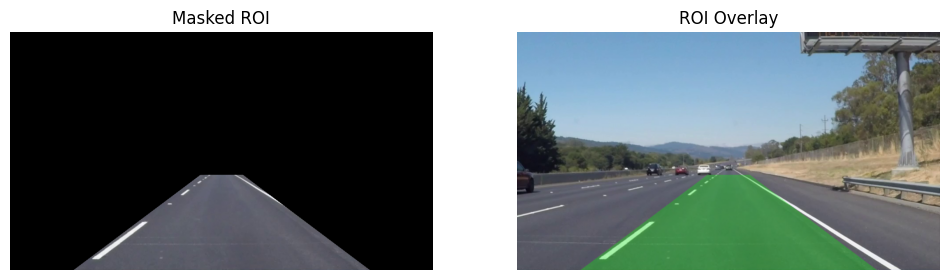

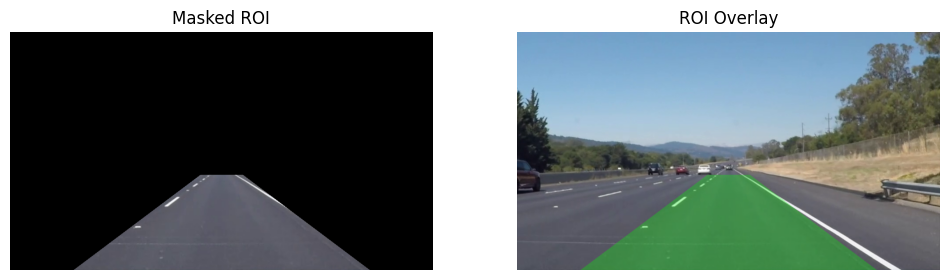

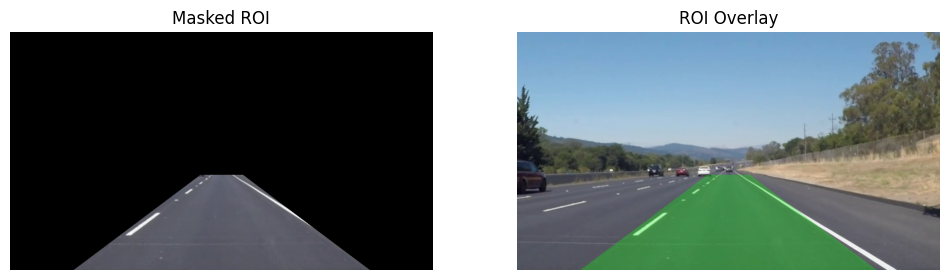

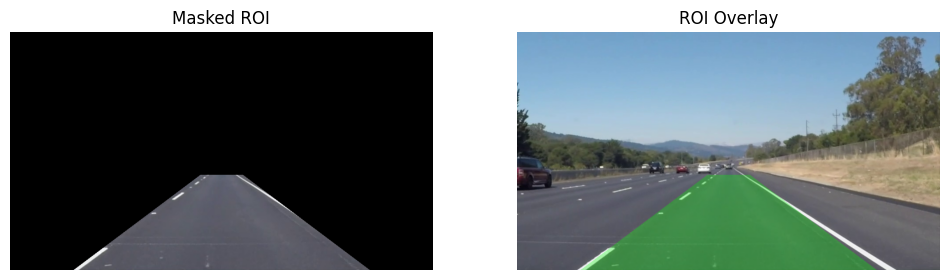

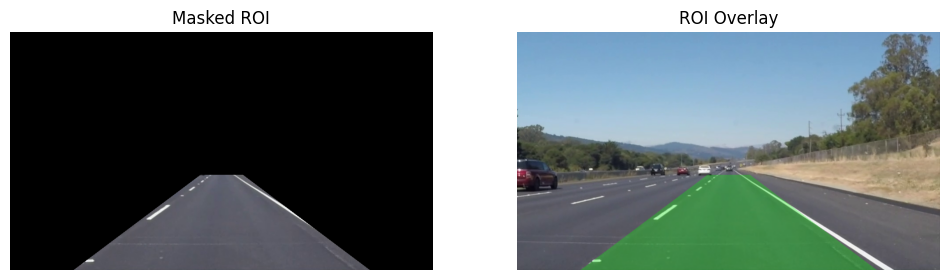

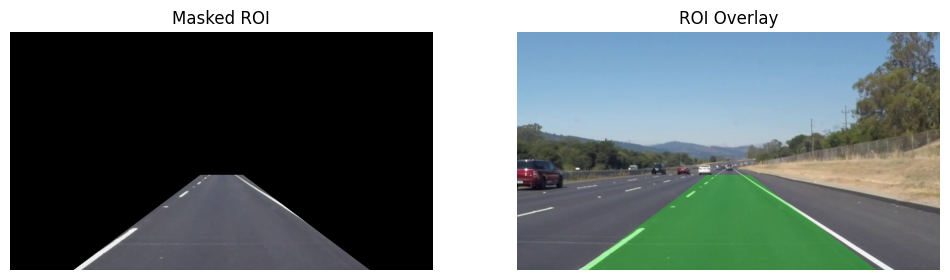

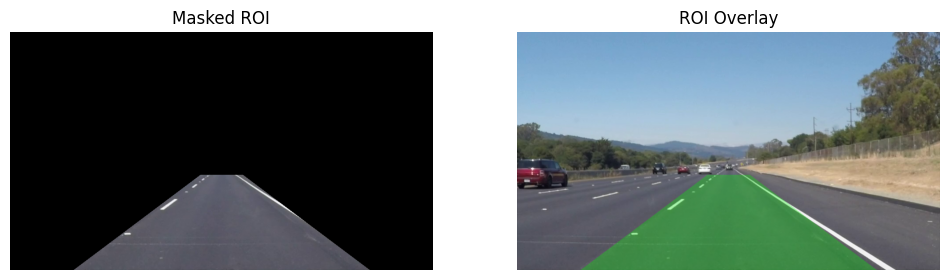

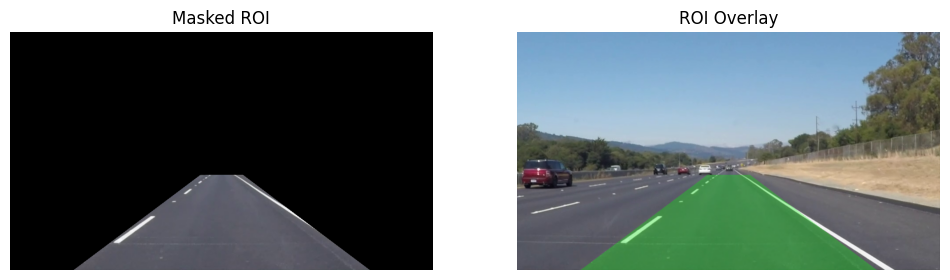

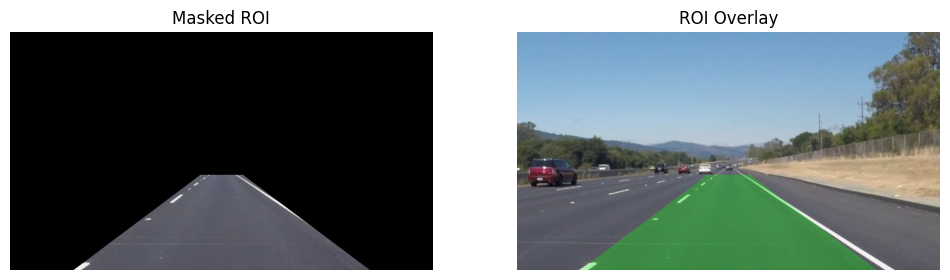

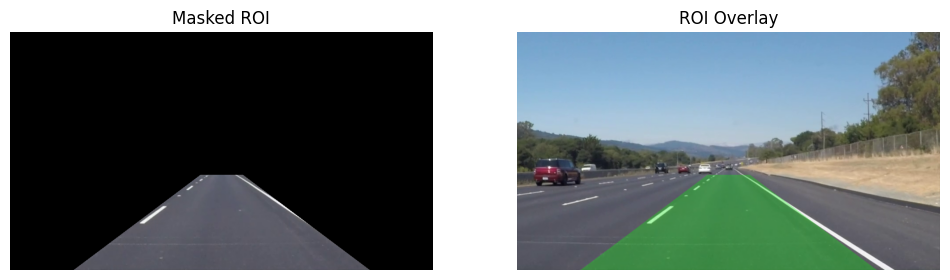

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_roi_inline(video_path, frame_skip=5, max_frames=50):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error opening video file.")
        return

    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret or frame_count >= max_frames:
            break

        if frame_count % frame_skip == 0:
            height, width = frame.shape[:2]

            roi_polygon = np.array([[ 
                (int(0.15 * width), height),
                (int(0.45 * width), int(0.6 * height)),
                (int(0.55 * width), int(0.6 * height)),
                (int(0.85 * width), height)
            ]], dtype=np.int32)

            # Create mask and apply it
            mask = np.zeros_like(frame)
            cv2.fillPoly(mask, roi_polygon, (255, 255, 255))
            roi_masked = cv2.bitwise_and(frame, mask)

            # Overlay visualization
            overlay = frame.copy()
            cv2.fillPoly(overlay, roi_polygon, color=(0, 255, 0))
            alpha = 0.3
            overlay_output = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

            # Convert BGR to RGB for display in matplotlib
            roi_rgb = cv2.cvtColor(roi_masked, cv2.COLOR_BGR2RGB)
            overlay_rgb = cv2.cvtColor(overlay_output, cv2.COLOR_BGR2RGB)

            # Plot
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(roi_rgb)
            plt.title("Masked ROI")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(overlay_rgb)
            plt.title("ROI Overlay")
            plt.axis("off")

            plt.show()

        frame_count += 1

    cap.release()

visualize_roi_inline(r"C:\Users\chatt\Desktop\LANE Detection\StraightLane_Detection\Straight_Lane2.mp4")
